In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Code.Tutorial.Dataset  import load_scg

In [12]:
def std_data(noise_level):
    signals_train_l, labels_train_l, duration, fs = load_scg(noise_level, 'train')
    signals_test_l, labels_test_l, _, _ = load_scg(noise_level, 'test')

    signals_l_train_ls = []
    labels_l_train_ls = []
    for cnt, signal in enumerate(signals_train_l):
        if max(signal) > 1:
            continue
        signals_l_train_ls.append(signal)
        labels_l_train_ls.append(labels_train_l[cnt])

    signals_l_test_ls = []
    labels_l_test_ls = []
    for cnt, signal in enumerate(signals_test_l):
        if max(signal) > 1:
            continue
        signals_l_test_ls.append(signal)
        labels_l_test_ls.append(labels_test_l[cnt])


    signals_l_train = np.array(signals_l_train_ls)
    signals_l_test = np.array(signals_l_test_ls)
    labels_l_train = np.array(labels_l_train_ls)
    labels_l_test = np.array(labels_l_test_ls)
    print(signals_l_train.shape, labels_l_test.shape)

    return labels_l_train, labels_l_test, signals_l_train, signals_l_test

In [22]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []

    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        pieces.append(signal[begin: end])

    return pieces

In [ ]:
def extract_dtw(signals, labels, alpha, cnt, show = True):
        # plt.plot(signal)
        signal, hr = signals[cnt], labels[cnt, 2]

        largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
        pieces = segmentation(signal, largepeaks)
        # piece0, piece1 = pieces[0], pieces[-1]
        piece0, piece1 = random.choice(pieces), random.choice(pieces)
        d, cost_matrix, acc_cost_matrix, path = dtw(piece0, piece1, lambda x, y: np.abs(x - y))

        print(f'path0:{path[0]}, len: {len(path[0])}')
        print(f'path1:{path[1]}, len: {len(path[1])}')

        if show:
            def draw_piece_peaks(piece):
                piece_peaks_, _ = find_peaks(piece, height=np.max(piece)*0.1, distance=len(piece)*0.15)
                piece_peaks = []

                if len(piece_peaks_) == 2:
                    piece_peaks = piece_peaks_
                elif len(piece_peaks_) > 2:
                    mmax = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax])
                    piece_peaks_ = np.delete(piece_peaks_, mmax)
                    mmax2 = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax2])
                elif len(piece_peaks_) < 2:
                    return None

                print(piece_peaks)
                print(len(piece))
                plt.figure()
                plt.plot(piece)
                plt.scatter(piece_peaks, piece[piece_peaks])
                plt.show()

            draw_piece_peaks(piece0)
            draw_piece_peaks(piece1)
            dtwPlotTwoWay(path[0], path[1], piece0, piece1, 0, 4e-6, 'gray')
            plt.figure()
            plt.plot(piece0)
            plt.plot(piece1)
            plt.show()

    def extract_ddtw(signals, labels, alpha, cnt, show = True):
        signal, hr = signals[cnt], labels[cnt, 2]

        largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
        pieces = segmentation(signal, largepeaks)
        piece0, piece1 = random.choice(pieces), random.choice(pieces)
        d, cost_matrix, acc_cost_matrix, path = dtw(piece0, piece1, lambda x, y: np.abs(x - y))

        piece0_diff = np.diff(piece0)
        piece1_diff = np.diff(piece1)
        print(len(piece0), len(piece0_diff))
        d, cost_matrix, acc_cost_matrix, path = dtw(piece0_diff, piece1_diff, lambda x, y: np.abs(x-y))

        path_arr = np.array(path) + 1
        path_arr_ = np.insert(path_arr, 0, np.array([0, 0]), axis=1)

        print(path)
        print(path_arr_)

        if show:
            def draw_piece_peaks(piece):
                piece_peaks_, _ = find_peaks(piece, height=np.max(piece)*0.1, distance=len(piece)*0.15)
                piece_peaks = []

                if len(piece_peaks_) == 2:
                    piece_peaks = piece_peaks_
                elif len(piece_peaks_) > 2:
                    mmax = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax])
                    piece_peaks_ = np.delete(piece_peaks_, mmax)
                    mmax2 = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax2])
                elif len(piece_peaks_) < 2:
                    return None

                print(piece_peaks)
                print(len(piece))
                plt.figure()
                plt.plot(piece)
                plt.scatter(piece_peaks, piece[piece_peaks])
                plt.show()

            draw_piece_peaks(piece0)
            draw_piece_peaks(piece1)
            plt.figure()
            plt.plot(piece0_diff)
            plt.plot(piece1_diff)
            dtwPlotTwoWay(path_arr_[0], path_arr_[1], piece0, piece1, 0, 4e-6, 'gray')
            plt.figure()
            plt.plot(piece0)
            plt.plot(piece1)
            plt.show()


(4718, 1000) (2822, 6)
(4718, 1000) (2822, 6)
45 44
(array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 23, 23, 24, 25, 26, 27, 28, 28, 29,
       30, 31, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 43, 43]), array([ 0,  1,  2,  3,  4,  5,  6,  6,  7,  8,  9,  9, 10, 11, 12, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 39, 39, 39, 40, 40, 41, 42, 43]))
[[ 0  1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
  23 24 24 24 25 26 27 28 29 29 30 31 32 32 33 34 35 36 37 38 39 40 41 42
  43 44 44 44]
 [ 0  1  2  3  4  5  6  7  7  8  9 10 10 11 12 13 13 14 15 16 17 18 19 20
  21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 40 40 40 41
  41 42 43 44]]
[ 3 27]
45


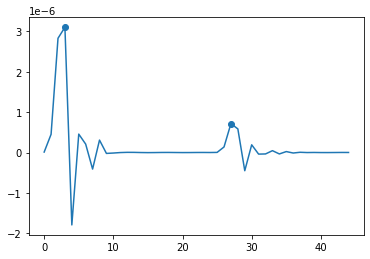

[ 3 28]
45


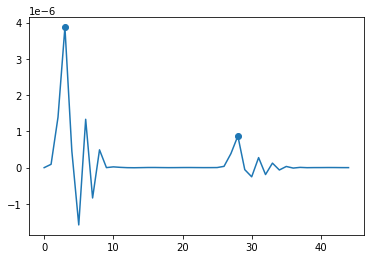

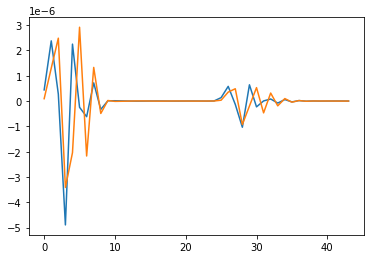

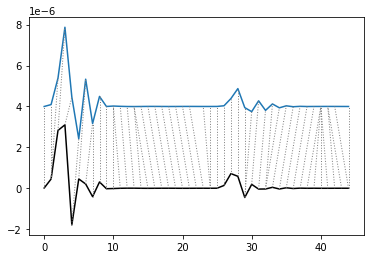

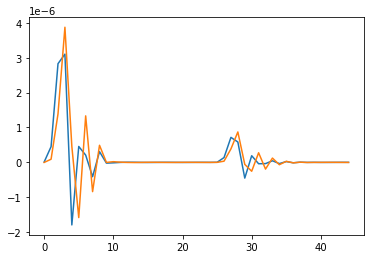

In [47]:
from tqdm import tqdm
from dtw.dtw import dtw
import random

if __name__=='__main__':
    labels_l_0_train, labels_l_0_test, signals_l_0_train, signals_l_0_test = std_data(0)
    labels_l_1_train, labels_l_1_test, signals_l_1_train, signals_l_1_test = std_data(0.1)


    # extract_dtw(signals_l_0_train,labels_l_0_train, 1, 4321)
    extract_ddtw(signals_l_0_train,labels_l_0_train, 1, 4321)


In [15]:
from matplotlib import collections as mc

def dtwPlotTwoWay(path1, path2, xts, yts, xoffset, yoffset, match_col):

    xts = xts + xoffset
    yts = yts + yoffset

    maxlen = max(len(xts), len(yts))
    times = np.arange(maxlen)
    xts = np.pad(xts, (0, maxlen - len(xts)), "constant", constant_values=np.nan)
    yts = np.pad(yts, (0, maxlen - len(yts)), "constant", constant_values=np.nan)

    fig, ax = plt.subplots()

    ax.plot(times, xts, color='k')
    ax.plot(times, yts)

    # https://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors
    idx = np.linspace(0, len(path1) - 1)

    idx = np.array(idx).astype(int)

    col = []
    for i in idx:
        col.append([(path1[i], xts[path1[i]]),
                    (path2[i], yts[path2[i]])])

    lc = mc.LineCollection(col, linewidths=1, linestyles=":", colors=match_col)
    ax.add_collection(lc)

    plt.show()

In [ ]:
from numpy import array, zeros, full, argmin, inf, ndim

def dtw_easy(x, y, dist, warp=1, s=1.0):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    :param int w: window size limiting the maximal distance between indices of matched entries |i,j|.
    :param float s: weight applied on off-diagonal moves of the path. As s gets larger, the warping path is increasingly biased towards the diagonal
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    assert s > 0
    r, c = len(x), len(y)

    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf

    D1 = D0[1:, 1:]  # view

    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
    C = D1.copy()

    jrange = range(c)
    for i in range(r):
        for j in jrange:
            min_list = [D0[i, j]]
            for k in range(1, warp + 1):
                i_k = min(i + k, r)
                j_k = min(j + k, c)
                min_list += [D0[i_k, j] * s, D0[i, j_k] * s]
            D1[i, j] += min(min_list)
    if len(x) == 1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1], C, D1, path

In [23]:
from numpy import array, zeros, full, argmin, inf, ndim
from math import isinf

def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while (i > 0) or (j > 0):
        tb = argmin((D[i, j], D[i, j + 1], D[i + 1, j]))
        if tb == 0:
            i -= 1
            j -= 1
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

def dtw(x, y, dist, warp=1, w=inf, s=1.0):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    :param int w: window size limiting the maximal distance between indices of matched entries |i,j|.
    :param float s: weight applied on off-diagonal moves of the path. As s gets larger, the warping path is increasingly biased towards the diagonal
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    assert isinf(w) or (w >= abs(len(x) - len(y)))
    assert s > 0
    r, c = len(x), len(y)

    if not isinf(w):
        D0 = full((r + 1, c + 1), inf)
        for i in range(1, r + 1):
            D0[i, max(1, i - w):min(c + 1, i + w + 1)] = 0
        D0[0, 0] = 0
    else:
        D0 = zeros((r + 1, c + 1))
        D0[0, 1:] = inf
        D0[1:, 0] = inf

    D1 = D0[1:, 1:]  # view

    for i in range(r):
        for j in range(c):
            if (isinf(w) or (max(0, i - w) <= j <= min(c, i + w))):
                D1[i, j] = dist(x[i], y[j])
    C = D1.copy()

    jrange = range(c)
    for i in range(r):
        if not isinf(w):
            jrange = range(max(0, i - w), min(c, i + w + 1))
        for j in jrange:
            min_list = [D0[i, j]]
            for k in range(1, warp + 1):
                i_k = min(i + k, r)
                j_k = min(j + k, c)
                min_list += [D0[i_k, j] * s, D0[i, j_k] * s]
            D1[i, j] += min(min_list)
    if len(x) == 1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1], C, D1, path